In [1]:
# Import libraries for CNN
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# for creating the training, testing, and validation data after preprocessing the input
from tensorflow.keras.applications.resnet50 import ResNet50

In [3]:
# the CNN architecture to be used
from tensorflow.keras.models import Model
from keras.callbacks import CSVLogger # for logging; output to csv file
import matplotlib.pyplot as plt # display the data graphically
import numpy as np
import pandas as pd
# for creating the confusion matrix
import seaborn as sn
# for visualizing the confusion matrix as heatmap

In [4]:
img_height, img_width =(224,224)
batch_size = 32
EPOCHS = 100

In [65]:
# callback functions
model_checkpoint_callback =tf.keras.callbacks.ModelCheckpoint(
    filepath=r'Fish_v27/chk/{epoch:02d}.pb',
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

csv_logger = CSVLogger("Fish_v27/save.csv", append=True,separator=';')
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [5]:
# Dataset Directories Used
train_path = r'C:/Users/Eliza Marie/Desktop/thesis 2/training/training'
validation_path = r"C:/Users/Eliza Marie/Desktop/thesis 2/training/validation"
test_path = r"C:/Users/Eliza Marie/Desktop/thesis 2/training/test"

In [7]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
#change to categorical
train = train_datagen.flow_from_directory(train_path, target_size=(224,224), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         seed=7,
                                         shuffle=True)

Found 1534 images belonging to 2 classes.


In [8]:
predict_datagen = ImageDataGenerator(rescale=1. / 255,
                                    preprocessing_function=preprocess_input)
predict = predict_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size = 1,class_mode='categorical')

Found 161 images belonging to 2 classes.


In [9]:
validation = train_datagen.flow_from_directory(validation_path, target_size=(224,224), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         seed=7,
                                         shuffle=True)

Found 164 images belonging to 2 classes.


In [64]:
# Model instantiation
base_model = ResNet50(include_top=False, weights="imagenet")
# Download & instantiate ResNet50 with ImageNet weights
x = base_model.output
# Taking the output of the last convolution block in ResNet50
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(train.num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [51]:
from keras import optimizers
sgdm = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [66]:
model.compile(optimizer=sgdm, loss = 'categorical_crossentropy' , 
                     metrics=['accuracy'])

In [67]:
model.fit(train,epochs=3, batch_size = batch_size ,
        #steps_per_epoch=num_train_imgs// batch_size,
        validation_data=validation,
        #validation_steps=num_test_imgs// batch_size,
        callbacks=[model_checkpoint_callback, csv_logger,earlyStop],
        #verbose=0,
        validation_freq=1)

Epoch 1/3
48/48 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.5711

INFO:tensorflow:Assets written to: Fish_v27/chk\01.pb\assets


INFO:tensorflow:Assets written to: Fish_v27/chk\01.pb\assets


48/48 [==============================] - 201s 4s/step - loss: 0.6884 - accuracy: 0.5711 - val_loss: 0.6501 - val_accuracy: 0.7805
Epoch 2/3
48/48 [==============================] - ETA: 0s - loss: 0.6307 - accuracy: 0.6551

INFO:tensorflow:Assets written to: Fish_v27/chk\02.pb\assets


INFO:tensorflow:Assets written to: Fish_v27/chk\02.pb\assets


48/48 [==============================] - 212s 4s/step - loss: 0.6307 - accuracy: 0.6551 - val_loss: 0.6237 - val_accuracy: 0.6585
Epoch 3/3
48/48 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.6995

INFO:tensorflow:Assets written to: Fish_v27/chk\03.pb\assets


INFO:tensorflow:Assets written to: Fish_v27/chk\03.pb\assets


48/48 [==============================] - 218s 5s/step - loss: 0.5947 - accuracy: 0.6995 - val_loss: 0.6016 - val_accuracy: 0.8415


In [68]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

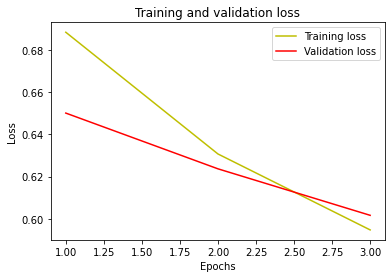

In [69]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
acc = model.history.history['accuracy']
#acc = history.history['accuracy']
val_acc = model.history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

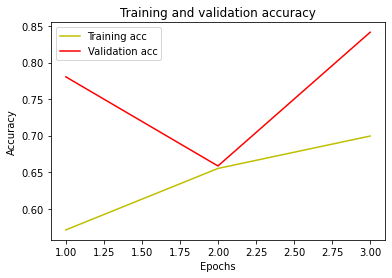

In [71]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
#Generate a batch of images
test_img, test_lbl = validation.__next__()
predictions=model.predict(test_img)

1/1 [==============================] - 5s 5s/step


In [73]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [74]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.78125


In [75]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
print(cm)

[[18  1]
 [ 6  7]]


<function matplotlib.pyplot.show(close=None, block=None)>

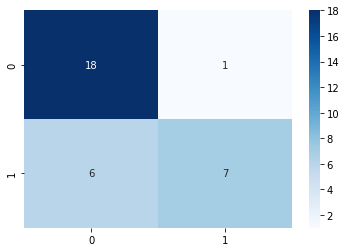

In [76]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show

In [77]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['tamban', 'turingan']

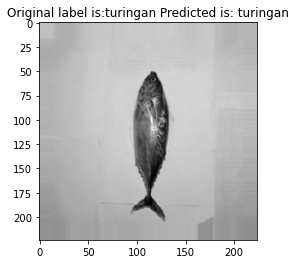

In [81]:
import random
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
#n = 17
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [79]:
# Saving the model
model.save('Fish_v27/final')
# Save the weights 

INFO:tensorflow:Assets written to: Fish_v27/final\assets


INFO:tensorflow:Assets written to: Fish_v27/final\assets
